<html>

<head>
  <script type="text/x-mathjax-config"> MathJax.Hub.Config({ TeX: { equationNumbers: { tags: 'ams' } } }); </script>
  <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
      tex2jax: {
        extensions: ["amsthm.js", "AMSmath.js","AMSsymbols.js", "autobold.js"],
        inlineMath: [ ['$','$'], ["\\(","\\)"] ],
         displayMath: [ ['$$','$$'], ["\\[","\\]"] ],
         processEscapes: true
      }
    });
  </script>
  <script src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML" type="text/javascript">
  </script>
  <meta name="google-site-verification" content="kuks5e4as6qBaGVCSzmHkQJa5Tss89_g5DmRXeUi7K8" />

  <style> 
  body{
    .previous {
    background-color: #f1f1f1;
    color: black;
    }
    .next {
      background-color: #04AA6D;
      color: white;
    }
    .example,.theorem,.lemma,.problem, .definition {
       font-weight:bold; 
    }
  }
  </style>
</head>


<h1> Worked Examples </h1>

In this section we solve some problems applying the tecniques saw in the Section <a href= "ConjugateDist"> Conjugate Distributions. </a>

<h2><a href="example1"> <strong>Example 1. </strong>  </a></h2>

*Tumor counts*: A cancer laboratory is estimating the rate of tumorigenesis in two strains of mice, A and B. They have tumor count data for 10 mice in strain A and 13 mice in strain B. Type A mice have been well studied, and information from other laboratories suggests that type A mice have tumor counts that are approximately Poisson-distributed with a mean of 12. Tumor count rates for type B mice are unknown, but type B mice are related to type A mice. The observed tumor counts for the two populations are

$$
y_A = (12,9,12,14,13,13,15,8,15,6)  \qquad y_B = (11,11,10,9,9,8,7,10,6,8,8,9,7)
$$

For this problem we will model the tumor counts in both strains as:  $y_A |\theta_A \sim \mathcal{P}ois(\theta_A)$ and $y_B |\theta_B \sim \mathcal{P}ois(\theta_B)$ with $\theta_A,\theta_B$ both random variables with prior distributions :

$$
\theta_A \sim Gamma(120, 10) \qquad \theta_B \sim Gamma(12,1), \qquad p(\theta_A,\theta_B) =p(\theta_A)p(\theta_B)
$$

The reason for these priors is the following. Remember that in a prior Gamma distribution 

* $\beta$ is interpreted as the number of prior obaservations
* $\alpha$ is interpretes as the sum of counts from $\beta$ prior observations

thus as it is known that the mean is 12 and there are 10 mices of type A, a natural choice for the parameters is $\alpha_A = 120, ~ \beta_A = 10$. For $\theta_B$ since we have not much information only that the mice of type B is similar to $A$ then a natural choice is: $\alpha_B = 12$ and $\beta_B = 1$, also in this case the prior expected values for $\theta_A$ and $\theta_B$ are both 12.




As it was shown in Section <a href= "ConjugateDist"> Conjugate Distributions </a> for this model the posterior distributions are also Gamma:

$$
\theta_A \vert y_A \sim Gamma(\alpha_A + \sum y_A, \beta_A + n_A), \qquad \theta_B  \vert y_B \sim Gamma(\alpha_B + \sum y_B, \beta_B + n_B)
$$

In [2]:
y_A = [12,9,12,14,13,13,15,8,15,6]
y_B = [11,11,10,9,9,8,7,10,6,8,8,9,7]

sum_yA = sum(y_A)
sum_yB = sum(y_B)

print(sum_yA)
print(sum_yB)

117
113


The posterior expected values are:
$$
\mathbb E(\theta_A| y_A) = \frac{120 +117}{20}=\frac{237}{20}, \qquad \mathbb E(\theta_B| y_B) = \frac{12 +113}{1 + 13} = \frac{125}{14}
$$

The posterior variances are:
$$
\mathbb V(\theta_A| y_A) = \frac{120 +117}{20^2}=\frac{237}{400}, \qquad \mathbb V(\theta_B| y_B) = \frac{125}{14^2}=\frac{125}{196} 
$$

Now we would like to compare both tumor counts. For this we will compute 

* $\mathbb{P}(\theta_A >\theta_B | y_A, y_B)$

* $\mathbb{P}(\tilde{Y}_A > \tilde{Y}_B)$ where $\tilde{Y}_A, \tilde{Y}_B$ are random variable whose distributions are the posterior predictive $p(\tilde{y}|y_A), ~ p(\tilde{y}|y_B)$ respectively.

As a matter of fact we will  estimate these two probabilities, for the estimation part we will run Monte Carlo Simulations.


<div style = "color: blue;"> Estimation of the probabilities </div> 

In [25]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sn

In [86]:
# declare the posterior parameters for theta_A and theta_B

# theta_A
a_A = 120 + sum_yA   
b_A = 10 + len(y_A)

# theta_B
a_B = 12 + sum_yB
b_B = 1 + len(y_B)

n_sim = 1000



we will generate n_im gamma random variables $\theta_A$ and $\theta_B$ and compute the proportion of times the event $\{\theta_A >\theta_B\}$ occurred, this will give us an estimation for this probability

In [87]:


theta_A = scipy.stats.gamma.rvs(a = a_A, scale = 1/b_A, size = n_sim)  

theta_B = scipy.stats.gamma.rvs(a = a_B, scale = 1/b_B, size = n_sim)

est_prob_thetas = np.mean(theta_A > theta_B)

print(f"The estimated probability of $\\theta_A > \\theta_B$ is {est_prob_thetas}")


The estimated probability of $\theta_A > \theta_B$ is 0.995


To compute the probability *"exactly"* we will have to use the fact that $p(\theta_A, \theta_B) = p(\theta_A)p(\theta_B)$ then compute numerically the following integral:

$$
\frac{20^{237}}{\Gamma(237)}\frac{14^{125}}{\Gamma(125)}\int_{0}^{+\infty}\int_{0}^{x} x^{236}y^{124}\exp(-20x-14y)dydx.
$$




Now, lets compute (an estimation for) the probability that, for new samples, the mice from strain A have more tumors than those from strain B. For this we will use the fact that the posterior predictive probability is a Negative Binomial

In [68]:
# parameters of NegBinom for mice A:
successA= a_A
prob_A = b_A/(b_A +1)

# parameters of NegBinom for mice B:
successB = a_B
prob_B = b_B/(b_B +1)



In [69]:
# run montecarlo sim for negative binomials:

y_A_new = scipy.stats.nbinom.rvs(n = successA, p = prob_A, size = n_sim)

y_B_new = scipy.stats.nbinom.rvs(n = successB, p = prob_B, size = n_sim)

est_prob_y = np.mean(y_A_new > y_B_new)

print(f"The estimated probability that Y_A_new > Y_B_new is : {est_prob_y}")

The estimated probability that Y_A_new > Y_B_new is : 0.698


Another approach to estimate this probability is the following:

For each iteration $i=1,\dots, n_{sim}$ we draw a sample $\theta_A^{i}$ from its gamma distribution and with this fixed value we draw a sample from $Poiss(\theta_A^{i})$. We do the same for $\theta_B$ and new samples $\tilde{y}_B$. In this way we obtain two sets of samples $y_A^1,\dots y_A^{n_{sim}}, ~ y_B^1,\dots y_B^{n_{sim}}$ and the compute the proportion of times that draws from sample A exceeded those from sample B.

In [70]:
# run montecarlo sim for poisson:

y_A_newPoiss = scipy.stats.poisson.rvs(mu = theta_A, size = n_sim)

y_B_newPoiss = scipy.stats.poisson.rvs(mu = theta_B, size = n_sim)

est_prob_y_pois = np.mean(y_A_newPoiss > y_B_newPoiss)

print(f"The estimated probability that Y_A_new > Y_B_new is : {est_prob_y_pois}")

The estimated probability that Y_A_new > Y_B_new is : 0.714


The following plot shows that both distributions are very similar and somehow justifies the fact that we can estimate the probability using either of those distributions.

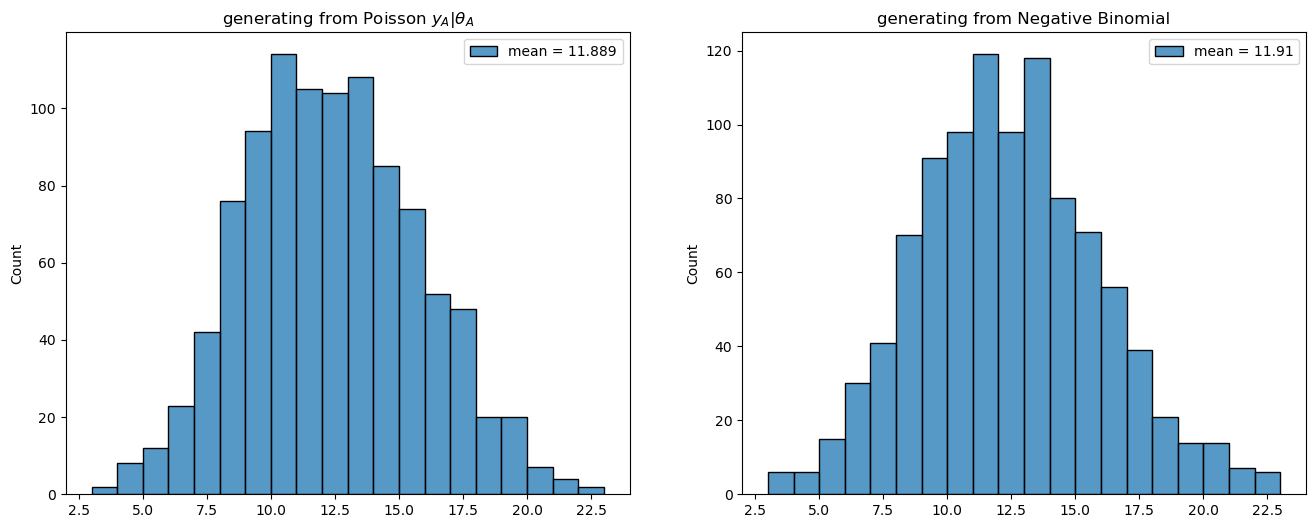

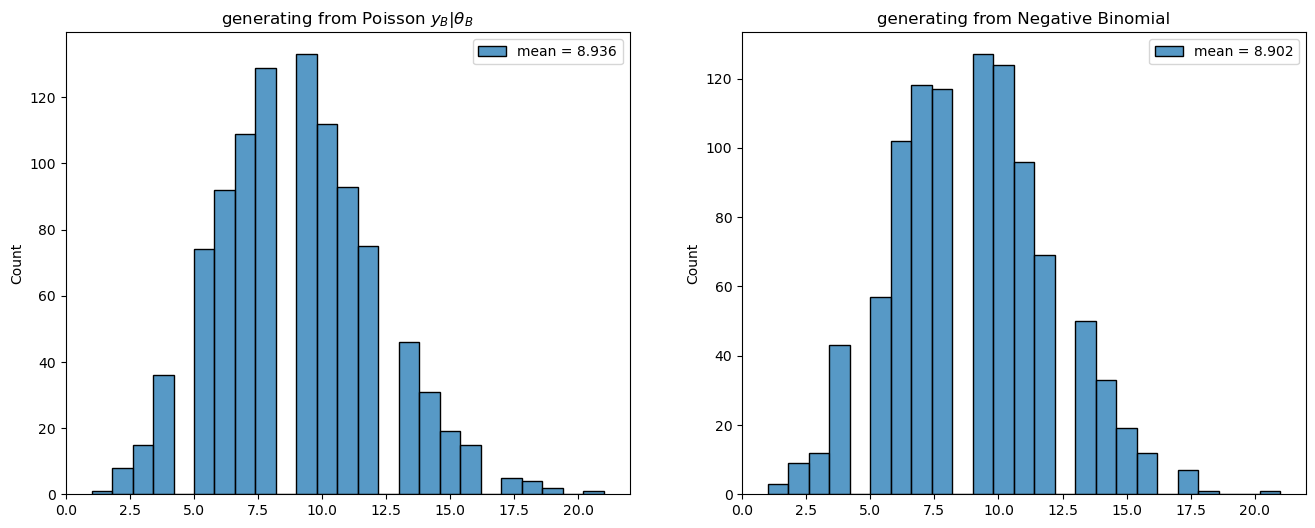

In [71]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sn.histplot(y_A_newPoiss, label = f"mean = {y_A_newPoiss.mean()}")
plt.legend()
plt.title("generating from Poisson $y_A |\\theta_A$")
plt.subplot(122)
sn.histplot(y_A_new, label = f"mean = {y_A_new.mean()}")
plt.legend()
plt.title("generating from Negative Binomial")
plt.show()

plt.figure(figsize=(16, 6))
plt.subplot(121)
sn.histplot(y_B_newPoiss, label = f"mean = {y_B_newPoiss.mean()}")
plt.legend()
plt.title("generating from Poisson $y_B |\\theta_B$")
plt.subplot(122)
sn.histplot(y_B_new, label = f"mean = {y_B_new.mean()}")
plt.legend()
plt.title("generating from Negative Binomial")
plt.show()

Now lets go back to the prior distribution of $\theta_B$. Lets consider different priors and see how this will affect the values of $\mathbb{P}(\theta_A >\theta_B | y_A, y_B)$ and $\mathbb{P}(\tilde{Y}_A > \tilde{Y}_B)$.

For $n_0\in\{10, 1, 0.5, 0.25, 0.1, 0.01 \}$ we will obtain $\mathbb{P}(\theta_A > \theta_B|y_A,y_B)$ with $\theta_a \sim Gamma(120, 10)$  and $\theta_B \sim Gamma(12n0, n0)$. 

In [114]:
N0 =  [10, 1,0.5, 0.25, 0.1, 0.05, 0.01]  #  np.linspace(0.1, 50, 500)#
N0.sort()
a_A = 120 + sum_yA   
b_A = 10 + len(y_A)

est_prob_thetas = []
n_sim = 1000

for n0 in N0:
    a_B = 12*n0 + sum_yB
    b_B = n0 + len(y_B)
    
    theta_A = scipy.stats.gamma.rvs(a = a_A, scale = 1/b_A, size = n_sim)  

    theta_B = scipy.stats.gamma.rvs(a = a_B, scale = 1/b_B, size = n_sim)

    est_prob_thetas.append( np.mean(theta_A > theta_B))

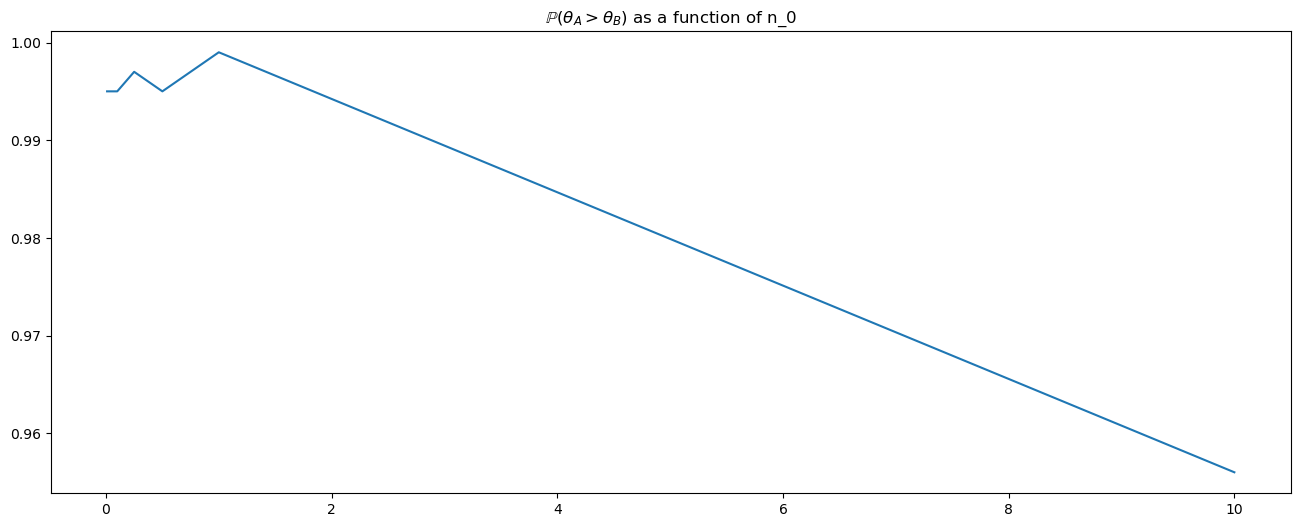

In [115]:
plt.figure(figsize=(16, 6))
plt.plot(N0, est_prob_thetas)
plt.title("$\\mathbb{P}(\\theta_A >\\theta_B)$ as a function of n_0")
plt.show()

From the plot above we see that $\mathbb{P}(\theta_A > \theta_B|y_A,y_B)$ decreases with bigger values of $n_0$, therefore the prior knowledge one has on the parameters changes the probability of the event but it seems to change little and the probability that the expected number of tumors for straain A is bigger than that of strain B is still high. Lets see if this is the case with the event $\{Y_A > Y_B\}$:

In [116]:
est_prob_y_pois = []
N0 = [10, 1,0.5, 0.25, 0.1, 0.05, 0.01]  # np.linspace(0.1, 50, 500)# 
N0.sort()

for n0 in N0:

    # parameters for the posterior of theta_B
    a_B = 12*n0 + sum_yB
    b_B = n0 + len(y_B)

    theta_A = scipy.stats.gamma.rvs(a = a_A, scale = 1/b_A, size = n_sim)  

    theta_B = scipy.stats.gamma.rvs(a = a_B, scale = 1/b_B, size = n_sim)

    y_A_newPoiss = scipy.stats.poisson.rvs(mu = theta_A, size = n_sim)

    y_B_newPoiss = scipy.stats.poisson.rvs(mu = theta_B, size = n_sim)

    est_prob_y_pois.append(np.mean(y_A_newPoiss > y_B_newPoiss))

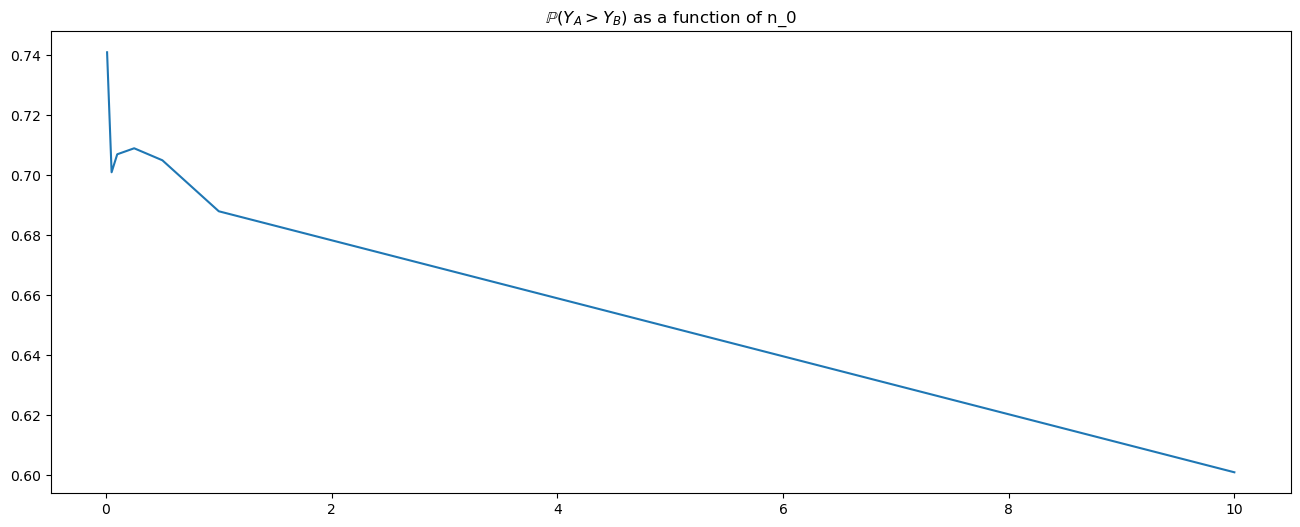

In [117]:
plt.figure(figsize=(16, 6))
plt.plot(N0, est_prob_y_pois)
plt.title("$\\mathbb{P}(Y_A >Y_B)$ as a function of n_0")
plt.show()

it appears that the estimation of this probability is more sensitive to the change in the prior distribution on $\theta_B$, at least compared to the probability $\mathbb{P}(\theta_A >\theta_B | y_A, y_B)$.

<div style="color:blue;">  Assesing the choice of Poisson model</div>

Finally, we will assess the model by means of a goodness of fit test. The procedure is the following: produce $N$ sets of samples of size $n_A = 10$ where the $i$-th sample set $\tilde{y}_A^{(i)}$ is drawn from $p(y|\theta_A)$ with $\theta_A$ sample from its posterior distribution $p(\theta_A | y_A)$. For each of this sample set of size $n_A$ we will compute the quantity $t(y_A)^{(i)}$ which is the ratio of the sample mean of $\tilde{y}_A^{(i)}$ to its sample standard deviation. Finally we will plot a histogram for the samples $t(y_A)^{(1)},\dots, t(y_A)^{(N)}$ 

In [173]:
N = 10000
n_A = 10
a_A = 120 + sum_yA   # posterior alpha for theta_A
b_A = 10 + len(y_A)  # posterior beta for theta_A
t = []

for i in range(N):

    theta_A = scipy.stats.gamma.rvs(a = a_A, scale = 1/a_B, size = n_A)
    ytilde_A = scipy.stats.poisson.rvs(mu = theta_A, size = n_A)
    t.append((ytilde_A.std())**2/ytilde_A.mean()) 
    #t.append(ytilde_A.std())
    

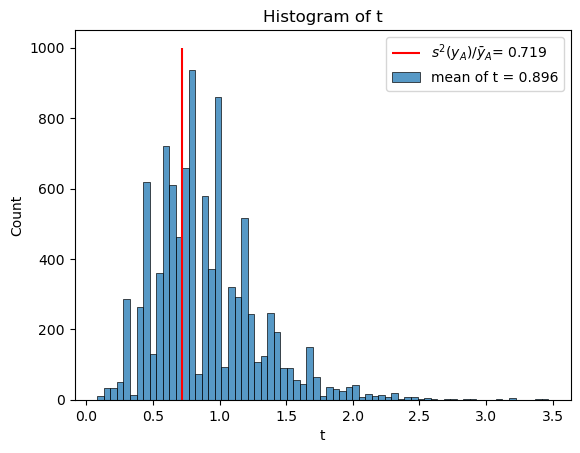

In [193]:
sn.histplot(t, label = "mean of t = {:.3f}".format(np.mean(t)))
plt.vlines((np.std(y_A)**2)/np.mean(y_A), ymin=0, ymax=1000, color = "red", label = "$s^2(y_A)/\\bar{y}_A$" +  "= {:.3f}".format((np.std(y_A)**2)/np.mean(y_A)))
plt.legend()
plt.xlabel("t")
plt.title("Histogram of t")
plt.show()


Note that the mean of $t$ is:

while the value of $\frac{S^2_{y_A}}{\bar{y}_A}$ the ratio of the sample mean to its sample variance is 0.719, not very close to 1 as it will be expected for Poisson data, the histogram above shows that our posterior model reproduces samples with similar behaviour than the sample observed.